# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [2]:
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [3]:
# Image generator functions
def image_generator_2D(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.float32)
    image[y1:y2, x1:x2] = 1
    return image


def image_generator_3D(x1, x2, y1, y2, z1, z2):
    image = np.zeros([10, 10, 10], np.float32)
    image[z1:z2, y1:y2, x1:x2] = 1
    return image

### Groupwise Registration Test (3D registration, 2D+time)

In [ ]:
# Create a vector of images for a 2D+time example in numpy
array_of_images = np.zeros([6, 100, 100], np.float32)
i = 0
for x in range(0, 30, 5):
    image = image_generator_2D(x, x+50, x, x+50)
    array_of_images[i] = image
    i += 1

image_itk = itk.image_view_from_array(array_of_images)

# Create Groupwise Parameter Object
parameter_object = itk.ParameterObject.New()
groupwise_parameter_map = parameter_object.GetDefaultParameterMap('groupwise',4)
groupwise_parameter_map['FinalBSplineInterpolationOrder'] = ['0']
groupwise_parameter_map['Transform'] = ['EulerStackTransform']
groupwise_parameter_map['AutomaticScalesEstimation'] = ['true']
groupwise_parameter_map['AutomaticScalesEstimationStackTransform'] = ['true']

parameter_object.AddParameterMap(groupwise_parameter_map)

result_image, result_transform_parameters = itk.elastix_registration_method(
    image_itk, image_itk,
    parameter_object,
    log_to_console=False)

### Groupwise Registration Test Visualization

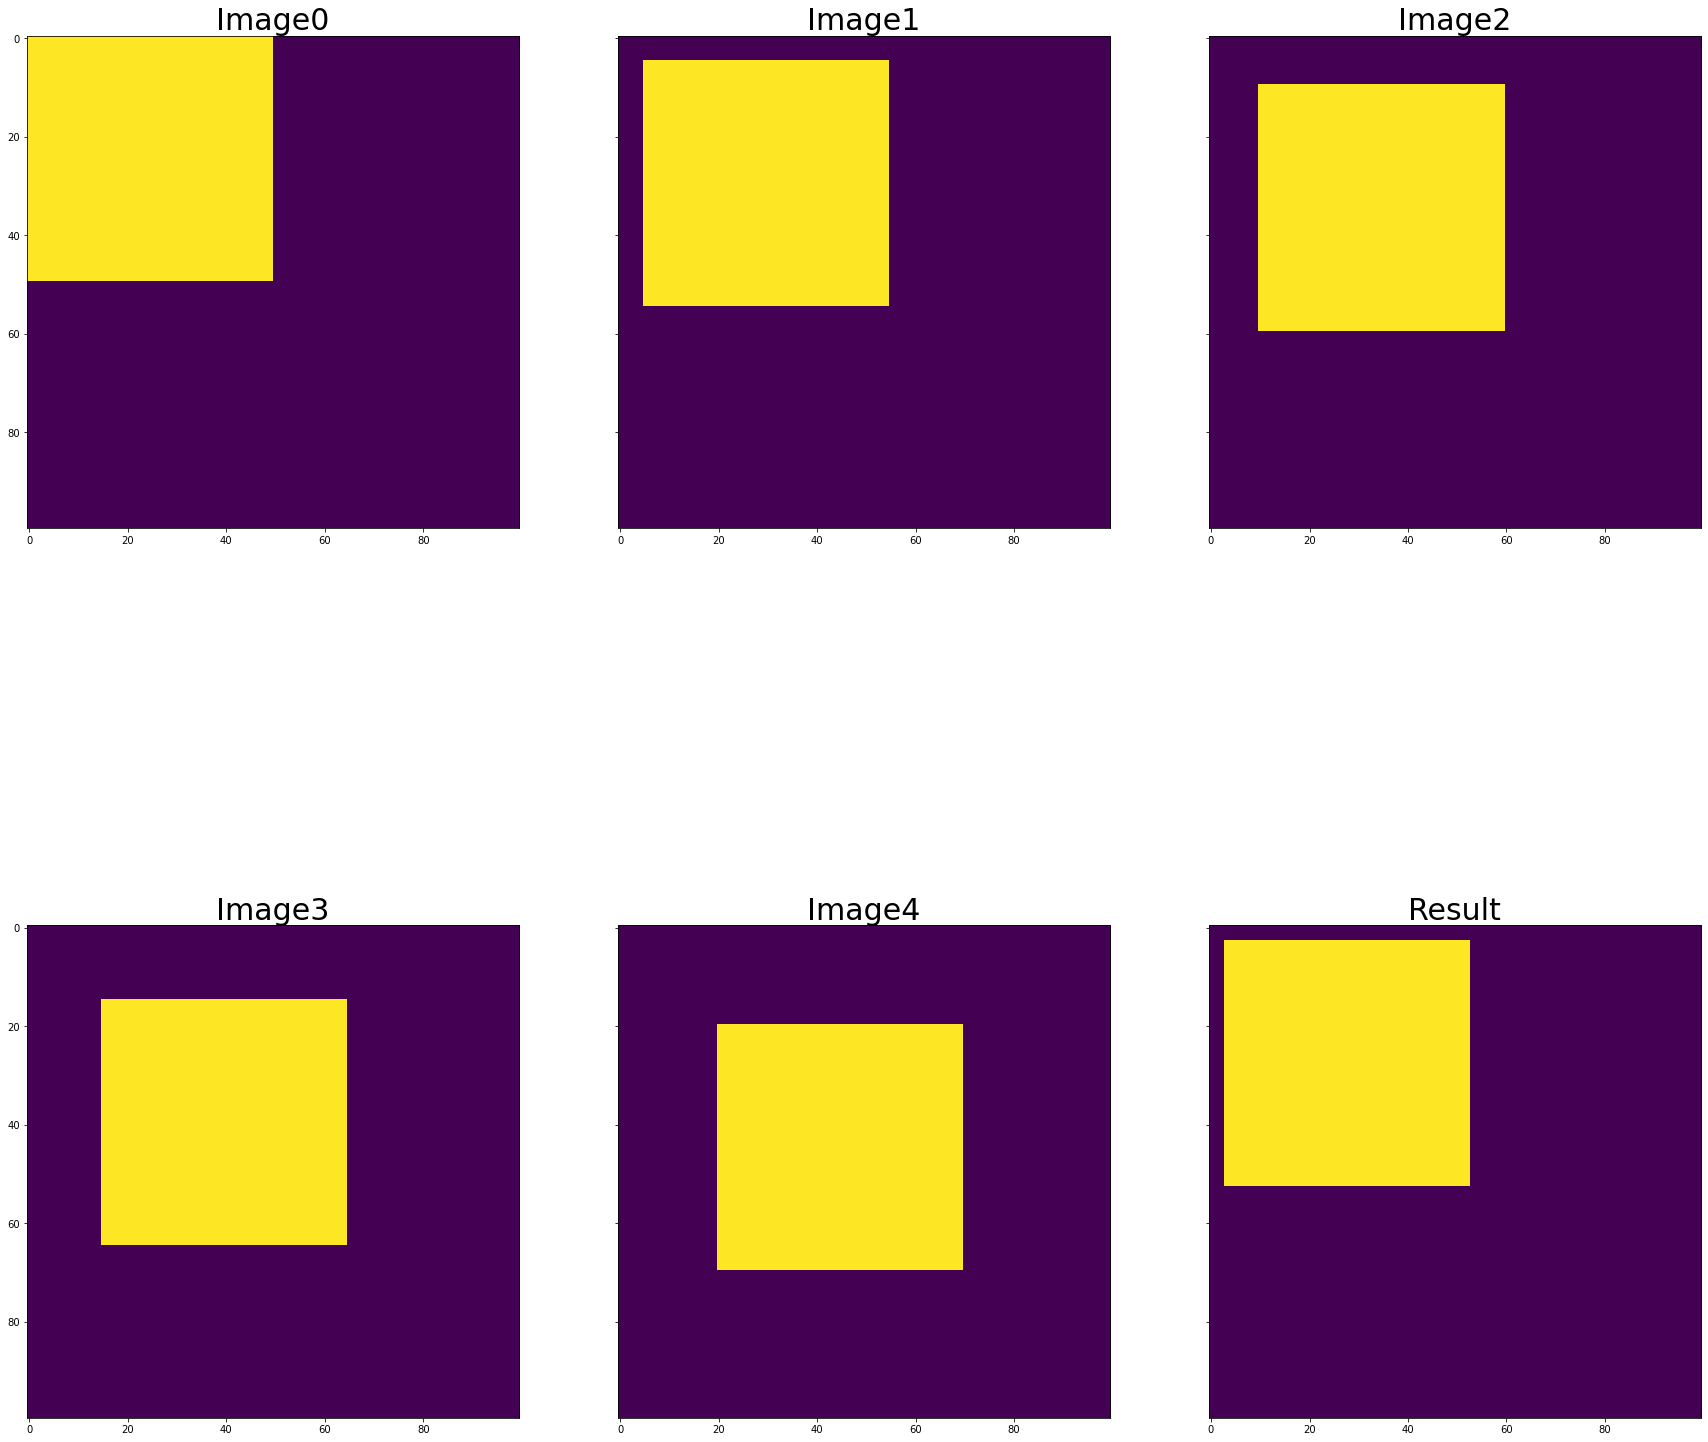

In [33]:
%matplotlib inline
result_image_np = np.asarray(result_image).astype(np.float32)

# Plot images
fig, axs = plt.subplots(2,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0,0].imshow(vector_of_images[0])
axs[0,0].set_title('Image0', fontsize=30)
axs[0,1].imshow(vector_of_images[1])
axs[0,1].set_title('Image1', fontsize=30)
axs[0,2].imshow(vector_of_images[2])
axs[0,2].set_title('Image2', fontsize=30)
axs[1,0].imshow(vector_of_images[3])
axs[1,0].set_title('Image3', fontsize=30)
axs[1,1].imshow(vector_of_images[4])
axs[1,1].set_title('Image4', fontsize=30)
axs[1,2].imshow(result_image_np[5])
axs[1,2].set_title('Result', fontsize=30)
plt.show()

### Groupwise Registration Test (4D registration, 3D+time)

In [ ]:
# Create a vector of images for a 3D+time example in numpy
array_of_images = np.zeros([6, 10, 10, 10], np.float32)
i = 0
for x in range(0, 30, 5):
    image = image_generator_3D(x, x+50, x, x+50, x, x+50)
    array_of_images[i] = image
    i += 1

image_itk = itk.image_view_from_array(array_of_images)

# Create Groupwise Parameter Object
parameter_object = itk.ParameterObject.New()
groupwise_parameter_map = parameter_object.GetDefaultParameterMap('groupwise',4)
groupwise_parameter_map['FinalBSplineInterpolationOrder'] = ['0']
groupwise_parameter_map['Transform'] = ['EulerStackTransform']
groupwise_parameter_map['AutomaticScalesEstimation'] = ['true']
groupwise_parameter_map['AutomaticScalesEstimationStackTransform'] = ['true']

parameter_object.AddParameterMap(groupwise_parameter_map)

result_image, result_transform_parameters = itk.elastix_registration_method(
    image_itk, image_itk,
    parameter_object,
    log_to_console=False)